# Channel Performance Analysis

### 1. Calculate the total profit by channel:

In [354]:
import pandas as pd

# Load the Excel file
file_path = '/Users/yuanzhiyi/Downloads/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx'
xls = pd.ExcelFile(file_path)

# Load the relevant sheets
df_value_info = pd.read_excel(xls, 'Value Info')
df_demographic_info = pd.read_excel(xls, 'Demographic Info')

# Merge the customer profit data with demographic data
profit_by_channel = df_demographic_info.merge(df_value_info, on='Customer ID')

# Group by 'Source of Customer' and sum up the 1st Order and Subsequent Order Profits
profit_by_channel_grouped = profit_by_channel.groupby('Source of Customer')[['1st Order Profit', 'Subsequent Order Profit']].sum()

profit_by_channel_grouped['Total Profit'] = profit_by_channel_grouped['1st Order Profit'] + profit_by_channel_grouped['Subsequent Order Profit']

# Display the result
profit_by_channel_grouped

,1st Order Profit,Subsequent Order Profit,Total Profit
Source of Customer,,,
Affiliates,29766.67596,108543.676304,138310.352264
Direct,118088.71520,416537.284480,534625.999680
Organic Search,90508.08441,316989.975240,407498.059650
Paid Search,69376.28180,236564.673760,305940.955560
Paid Social,19028.85936,66661.976832,85690.836192


### 2. Calculate the net profit for 'Paid Search' and 'Affiliates' channels:
(Customer Acquisition Cost is closely related to the first order)

In [4]:
df_cost = pd.read_excel(xls, 'Cost')

# Group by channel
cost_by_channel = df_cost[['Paid Search', 'Affiliates']].sum()

# Calculate the net profit for each channel
filter_profit_by_channel = profit_by_channel_grouped.loc[['Paid Search', 'Affiliates']].copy()

# Subtract the corresponding channel cost from the profit
filter_profit_by_channel.loc['Paid Search', '1st Order Profit'] -= cost_by_channel['Paid Search']
filter_profit_by_channel.loc['Affiliates', '1st Order Profit'] -= cost_by_channel['Affiliates']

net_profit_by_channel

,1st Order Profit,Subsequent Order Profit
Source of Customer,,
Paid Search,-117976.59820,236564.673760
Affiliates,-170076.32404,108543.676304


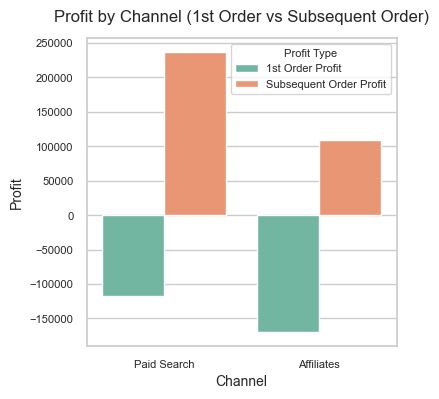

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a chart for profit by channel
data = {
    'Channel': ['Paid Search', 'Affiliates','Paid Search', 'Affiliates'],
    'Profit Type': ['1st Order Profit', '1st Order Profit', 'Subsequent Order Profit', 'Subsequent Order Profit'],
    'Profit': [-117976.60, -170076.32, 236564.67, 108543.68]
}

df = pd.DataFrame(data)
plt.figure(figsize=(4, 4))

sns.barplot(x='Channel', y='Profit', hue='Profit Type', data=df, palette='Set2')
sns.set(style="whitegrid")

# Define title and labels
plt.title('Profit by Channel (1st Order vs Subsequent Order)', fontsize=12, pad=12)
plt.xlabel('Channel', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Profit Type', title_fontsize='8',fontsize=8)
plt.show()

### 3. Summary：
#### - Direct and organic search channels were the most profitable while paid social and affiliates underperformed. 
#### - Paid search and affiliates channels had negative 1st order profit. But the profit of subsequent orders of the affiliates channel was not higher than that of other channels.

# Demographic Difference Analysis

### 1. Age distribution:

In [530]:
df_demo = pd.read_excel(xls, 'Demographic Info')

# Check for missing values
df_demo.isnull().sum()

# Remove rows with missing values
df_demo_clean = df_demo.dropna()

# Convert to data format
df_demo_clean.loc[:, 'Date Of Birth'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_demo_clean['Date Of Birth'], unit='D')

# Calculate 'Age'
today = datetime.today()
df_demo_clean.loc[:, 'Age'] = (today - df_demo_clean['Date Of Birth']).dt.days // 365

print(df_demo_clean[['Date Of Birth', 'Age']].head())

# Age profile
age_profile = df_demo_clean['Age'].mean()

print(f"User age profile: average age is {age_profile:.1f} years old.")

  Date Of Birth  Age
0    1973-06-29   51
1    1984-07-25   40
2    1991-05-01   33
3    1986-11-30   37
4    1991-10-02   32
User age profile: average age is 45.6 years old.


### 2. Gender distribution:

In [523]:
gender_distribution = df_demo_clean['Title'].value_counts()
print(gender_distribution)

# Gender profile
gender_profile = gender_distribution.idxmax()
print(f"User gender profile: {gender_profile} title is dominant.")

Title
Mr      19981
Miss     2712
Ms       2340
Mrs      2330
Name: count, dtype: int64
User gender profile: Mr title is dominant.


### 3. Location distribution:

In [532]:
location_distribution = df_demo_clean['Address City'].value_counts()
print(location_distribution.head(10))

# Location Profile
location_profile = location_distribution.idxmax()
print(f"User location profile: users are mainly located in {location_profile}.")

Address City
Dublin       19015
Cork           939
Galway         572
Limerick       548
Waterford      341
Kilkenny       227
Tallaght       216
Wexford        216
Mullingar      214
Dundalk        201
Name: count, dtype: int64
User location profile: users are mainly located in Dublin.


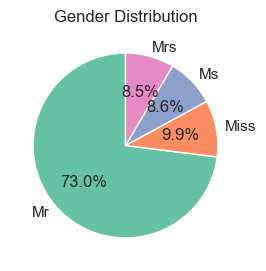

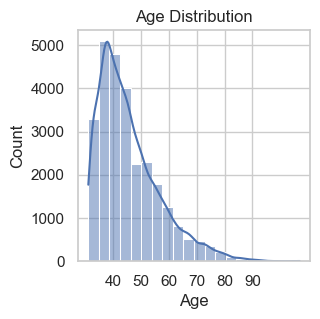

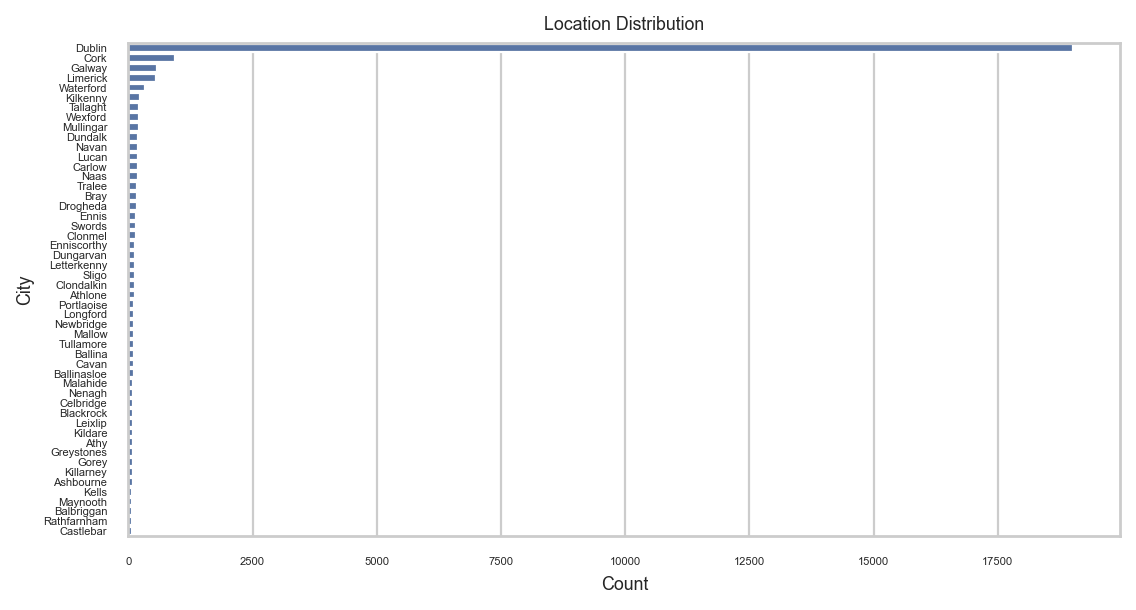

In [483]:
# Pie chart for gender distribution
gender_counts = df_demo_clean['Title'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(gender_counts)))
plt.title('Gender Distribution')
plt.show()

# Histogram for age distribution
plt.figure(figsize=(3,3))
ax = sns.histplot(df_demo_clean['Age'], bins=20, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([40, 50, 60, 70, 80, 90])  
plt.show()

# Bar chart for location distribution 
plt.figure(figsize=(8,4),dpi=160)
sns.countplot(y='Address City', data=df_demo_clean, order=df_demo_clean['Address City'].value_counts().index)
plt.title('Location Distribution',fontsize=8)
plt.xlabel('Count',fontsize=8)
plt.ylabel('City',fontsize=8)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

### 4. Summary:
#### - The age of customers was mainly concentrated around 40-50 years old.
#### - The majority of customers were male.
#### - Customers from Dublin made up the majority, which was expected given Ireland’s population distribution.